In [1]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

Input bounds:

In [2]:
m = 0
eps = 2

In [3]:
l = m - eps
u = m + eps

In [4]:
x = np.linspace(l, u, 1001)
x

array([-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ])

Constant bounds:

In [5]:
#y_l = expit(l)
#y_u = expit(u)
# let x = x_2 - x_1, y = expit(-x) to be in line with AISTATS paper
y_l = expit(-u)
y_u = expit(-l)
(y_l, y_u)

(0.11920292202211755, 0.8807970779778823)

In [6]:
log_y_l = np.log(y_l)
log_y_u = np.log(y_u)
(log_y_l, log_y_u)

(-2.1269280110429727, -0.12692801104297263)

Softmax itself:

In [7]:
y = expit(-x)
y

array([0.88079708, 0.88037646, 0.87995457, ..., 0.12004543, 0.11962354,
       0.11920292])

Nonlinear lower bounds:

In [8]:
#ERl = 1 / ((u - x) / (u - l) / y_l + (x - l) / (u - l) / y_u)
ERl = 1 / ((u - x) / (u - l) / y_u + (x - l) / (u - l) / y_l)
ERl

array([0.88079708, 0.87520534, 0.86968416, ..., 0.11940942, 0.11930608,
       0.11920292])

In [9]:
#LSEl = y_l**((u - x) / (u - l)) * y_u**((x - l) / (u - l))
LSEl = y_u**((u - x) / (u - l)) * y_l**((x - l) / (u - l))
LSEl

array([0.88079708, 0.87903724, 0.87728093, ..., 0.11968069, 0.11944157,
       0.11920292])

Nonlinear upper bounds:

In [10]:
ERu = y_l + y_u - y_l * y_u / y
ERu

array([0.88079708, 0.88074013, 0.88068295, ..., 0.12538459, 0.12229994,
       0.11920292])

In [11]:
LSEu = (y_l * log_y_u - y_u * log_y_l + (y_u - y_l) * np.log(y)) / (log_y_u - log_y_l)
LSEu

array([0.88079708, 0.88061519, 0.88043266, ..., 0.12188488, 0.12054422,
       0.11920292])

Bounds on complementary softmax function --- SKIP

In [13]:
ym_l = expit(-l)
ym_u = expit(-u)
(ym_l, ym_u)

(0.8807970779778823, 0.11920292202211755)

In [14]:
log_ym_l = np.log(ym_l)
log_ym_u = np.log(ym_u)
(log_ym_l, log_ym_u)

(-0.12692801104297263, -2.1269280110429727)

In [14]:
LSEml = ym_l**((u - x) / (u - l)) * ym_u**((x - l) / (u - l))
1 - LSEml

array([0.26894142, 0.27093837, 0.27292987, ..., 0.95231397, 0.95244422,
       0.95257413])

In [15]:
ym = expit(-x)
ym

array([0.73105858, 0.7302714 , 0.72948278, ..., 0.0477886 , 0.04760691,
       0.04742587])

In [16]:
LSEmu = (ym_l * log_ym_u - ym_u * log_ym_l + (ym_u - ym_l) * np.log(ym)) / (log_ym_u - log_ym_l)
1 - LSEmu

array([0.26894142, 0.26921068, 0.26948072, ..., 0.95066989, 0.95162192,
       0.95257413])

In [17]:
linl = y_l + y_l * (1 - y_l) * (x - l)
linl

array([0.26894142, 0.26972787, 0.27051432, ..., 1.05381626, 1.05460271,
       1.05538915])

In [18]:
linu = y_u + y_u * (1 - y_u) * (x - u)
linu

array([0.77186749, 0.77204819, 0.7722289 , ..., 0.95221271, 0.95239342,
       0.95257413])

Linear bounds of Shi et al. (ICLR 2020) and Bonaert et al. (PLDI 2021)

In [52]:
#t = min(np.log((np.exp(-l) - np.exp(-u)) / (u - l)), 1 - u)
t = min(np.log((np.exp(u) - np.exp(l)) / (u - l)), 1 + l)
t

-1

In [53]:
np.log((np.exp(u) - np.exp(l)) / (u - l))

0.5952201920542229

In [59]:
#L = 1 + np.exp(t) * (1 - u - t)
#U = 1 + np.exp(-l)
L = 1 + np.exp(t) * (1 + l - t)
U = 1 + np.exp(u)
T = max(np.sqrt(L * U), U / 2)
L, U, T

(1.0, 8.38905609893065, 4.194528049465325)

In [92]:
#linl = 1 / T * (2 - 1 / T * (1 + (x - l) / (u - l) * np.exp(-u) + (u - x) / (u - l) * np.exp(-l)))
linl = 1 / T * (2 - 1 / T * (1 + (x - l) / (u - l) * np.exp(u) + (u - x) / (u - l) * np.exp(l)))
linl

array([4.12282243e-01, 4.11869961e-01, 4.11457679e-01, ...,
       8.24564486e-04, 4.12282243e-04, 5.29367315e-17])

In [93]:
#linu = 1 / L + 1 / U - 1 / (L * U) * (1 + np.exp(t) * (1 - x - t))
linu = 1 / L + 1 / U - 1 / (L * U) * (1 + np.exp(t) * (1 + x - t))
linu

array([1.        , 0.99982459, 0.99964918, ..., 0.8249416 , 0.82476619,
       0.82459078])

Plot:

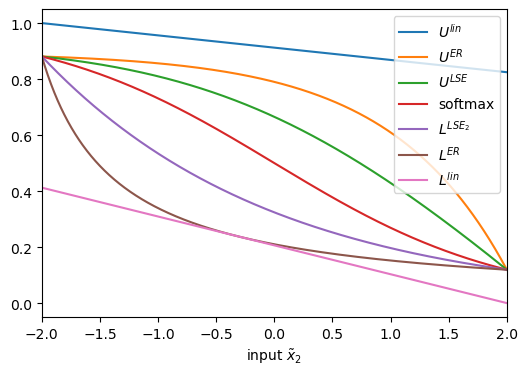

In [18]:
plt.figure(figsize=(6., 4.))
plt.plot(x, linu)
plt.plot(x, ERu)
plt.plot(x, LSEu)
plt.plot(x, y)
plt.plot(x, LSEl)
plt.plot(x, ERl)
plt.plot(x, linl)
#plt.plot(x, 1 - LSEml)
#plt.plot(x, 1 - LSEmu)
#if l < 0:
#if u > 0:
#plt.legend(['true', 'ERl', 'LSEl', 'ERu', 'LSEu', 'LSEcl', 'LSEcu'])
plt.xlim([l, u])
plt.xlabel(r'input $\tilde{x}_2$')
plt.legend(['$U^{lin}$', '$U^{ER}$', '$U^{LSE}$', 'softmax', '$L^{LSE_2}$', '$L^{ER}$', '$L^{lin}$'])
plt.savefig('figures/logistic_bounds_aistats.pdf', bbox_inches='tight')

## Plots for presentation

Illustrate convex lower bound and convex upper bound

In [161]:
figSize = (3.9, 3.5)

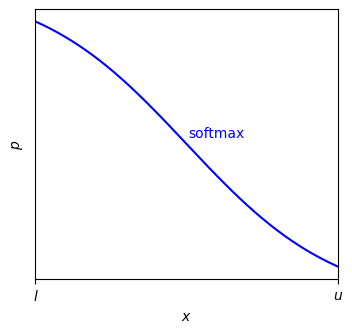

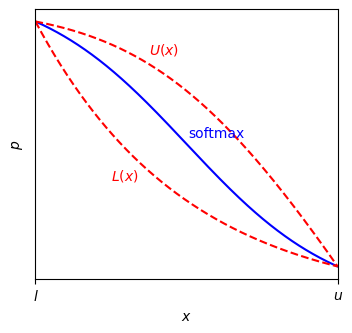

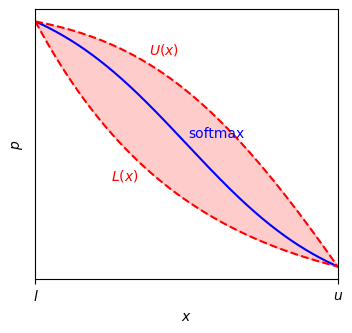

In [209]:
for stage in range(3):
    plt.figure(figsize=figSize)
    plt.plot(x, y, 'b')
    plt.annotate('softmax', (0.02, 0.52), color='b')
    plt.xlim([l, u])
    plt.xticks([l, u], labels=[r'$l$', r'$u$'])
    plt.yticks([])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p$')
    if stage > 0:
        plt.plot(x, LSEl, 'r--')
        plt.plot(x, LSEu, 'r--')
        plt.text(-1, 0.39, r'$L(x)$', color='r')
        plt.text(-0.5, 0.78, r'$U(x)$', color='r')
    if stage > 1:
        plt.fill_between(x, LSEl, LSEu, color='r', alpha=0.2)
    plt.savefig(f'../../../AISTATS 2023/Presentation/softmax_bounds_{stage}.png', bbox_inches='tight', dpi=300)

Linear bounds

In [98]:
figSize2 = (2.9, 2.6)

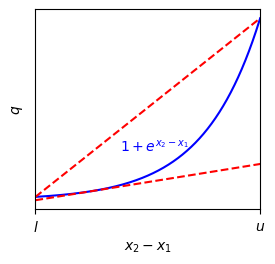

In [196]:
plt.figure(figsize=figSize2)
plt.plot(x, 1 + np.exp(x), 'b')
plt.annotate(r'$1 + e^{x_2-x_1}$', (-0.5, 3), color='b')
#plt.annotate(r'$1 + \mathrm{SumExp}(x)$', (-0.72, 3), color='b')
plt.xlim([l, u])
plt.xticks([l, u], labels=[r'$l$', r'$u$'])
try:
    plt.ylim(yLim0)
except NameError:
    pass
plt.yticks([])
#plt.xlabel(r'$x$')
plt.xlabel(r'$x_2 - x_1$')
plt.ylabel(r'$q$')
plt.savefig(f'../../../AISTATS 2023/Presentation/exp_bounds_lin_0.png', bbox_inches='tight', dpi=300)
plt.plot(x, 1 + np.exp(t) * (1 + x - t), 'r--')
plt.plot(x, 1 + (x - l) / (u - l) * np.exp(u) + (u - x) / (u - l) * np.exp(l), 'r--')
yLim0 = plt.ylim()
plt.savefig(f'../../../AISTATS 2023/Presentation/exp_bounds_lin.png', bbox_inches='tight', dpi=300)

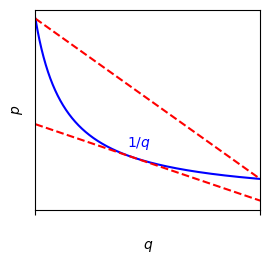

In [197]:
q = np.linspace(L, U, 1001)
plt.figure(figsize=figSize2)
plt.plot(q, 1 / q, 'b')
plt.plot(q, 1 / T * (2 - q / T), 'r--')
plt.plot(q, 1 / L + 1 / U - q / (L * U), 'r--')
plt.annotate(r'$1 / q$', (4, 0.3), color='b')
plt.xlim([L, U])
#plt.xticks([L, U], labels=[r'$l$', r'$u$'])
plt.xticks([L, U], labels=[' ', ' '])
#plt.xticks([])
plt.yticks([])
plt.xlabel(r'$q$')
plt.ylabel(r'$p$')
plt.savefig(f'../../../AISTATS 2023/Presentation/recip_bounds_lin.png', bbox_inches='tight', dpi=300)

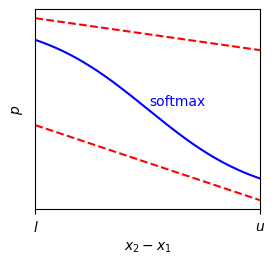

In [198]:
plt.figure(figsize=figSize2)
plt.plot(x, y, 'b')
plt.plot(x, linl, 'r--')
plt.plot(x, linu, 'r--')
plt.annotate('softmax', (0.02, 0.52), color='b')
plt.xlim([l, u])
plt.xticks([l, u], labels=[r'$l$', r'$u$'])
plt.yticks([])
plt.xlabel(r'$x_2 - x_1$')
plt.ylabel(r'$p$')
plt.savefig(f'../../../AISTATS 2023/Presentation/softmax_bounds_lin.png', bbox_inches='tight', dpi=300)

ER bounds

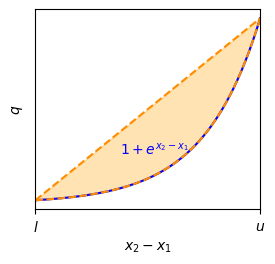

In [199]:
plt.figure(figsize=figSize2)
plt.plot(x, 1 + np.exp(x), 'b')
plt.annotate(r'$1 + e^{x_2-x_1}$', (-0.5, 3), color='b')
#plt.annotate(r'$1 + \mathrm{SumExp}(x)$', (-0.72, 3), color='b')
plt.xlim([l, u])
plt.xticks([l, u], labels=[r'$l$', r'$u$'])
plt.yticks([])
#plt.xlabel(r'$x$')
plt.xlabel(r'$x_2 - x_1$')
plt.ylabel(r'$q$')
plt.savefig(f'../../../AISTATS 2023/Presentation/exp_bounds_ER_0.png', bbox_inches='tight', dpi=300)
plt.plot(x, 1 + np.exp(x), color='darkorange', linestyle='--')
plt.savefig(f'../../../AISTATS 2023/Presentation/exp_bounds_ER_1.png', bbox_inches='tight', dpi=300)
plt.plot(x, 1 + (x - l) / (u - l) * np.exp(u) + (u - x) / (u - l) * np.exp(l), color='darkorange', linestyle='--')
plt.savefig(f'../../../AISTATS 2023/Presentation/exp_bounds_ER_2.png', bbox_inches='tight', dpi=300)
plt.fill_between(x, 1 + np.exp(x), 1 + (x - l) / (u - l) * np.exp(u) + (u - x) / (u - l) * np.exp(l), color='orange', alpha=0.3)
plt.savefig(f'../../../AISTATS 2023/Presentation/exp_bounds_ER_3.png', bbox_inches='tight', dpi=300)

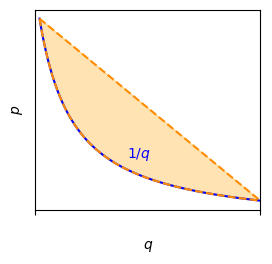

In [200]:
L_ER = 1 + np.exp(l)
q = np.linspace(L_ER, U, 1001)
plt.figure(figsize=figSize2)
plt.plot(q, 1 / q, 'b')
plt.plot(q, 1 / q, color='darkorange', linestyle='--')
plt.plot(q, 1 / L_ER + 1 / U - q / (L_ER * U), color='darkorange', linestyle='--')
plt.fill_between(q, 1 / q, 1 / L_ER + 1 / U - q / (L_ER * U), color='orange', alpha=0.3)
plt.annotate(r'$1 / q$', (4, 0.3), color='b')
plt.xlim([L_ER, U])
#plt.xticks([L, U], labels=[r'$l$', r'$u$'])
plt.xticks([L, U], labels=[' ', ' '])
#plt.xticks([])
plt.yticks([])
plt.xlabel(r'$q$')
plt.ylabel(r'$p$')
plt.savefig(f'../../../AISTATS 2023/Presentation/recip_bounds_ER.png', bbox_inches='tight', dpi=300)

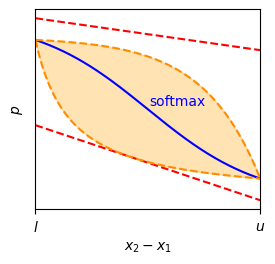

In [201]:
plt.figure(figsize=figSize2)
plt.plot(x, y, 'b')
plt.plot(x, linl, 'r--')
plt.plot(x, linu, 'r--')
plt.plot(x, ERl, color='darkorange', linestyle='--')
plt.plot(x, ERu, color='darkorange', linestyle='--')
plt.fill_between(x, ERl, ERu, color='orange', alpha=0.3)
plt.annotate('softmax', (0.02, 0.52), color='b')
plt.xlim([l, u])
plt.xticks([l, u], labels=[r'$l$', r'$u$'])
plt.yticks([])
plt.xlabel(r'$x_2 - x_1$')
plt.ylabel(r'$p$')
plt.savefig(f'../../../AISTATS 2023/Presentation/softmax_bounds_ER.png', bbox_inches='tight', dpi=300)

LSE bounds

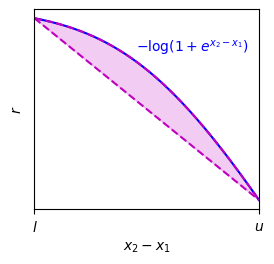

In [206]:
plt.figure(figsize=figSize2)
plt.plot(x, -np.log(1 + np.exp(x)), 'b')
plt.annotate(r'$-\log(1 + e^{x_2-x_1})$', (-0.2, -0.5), color='b')
#plt.annotate(r'$1 + \mathrm{SumExp}(x)$', (-0.72, 3), color='b')
plt.xlim([l, u])
plt.xticks([l, u], labels=[r'$l$', r'$u$'])
plt.yticks([])
#plt.xlabel(r'$x$')
plt.xlabel(r'$x_2 - x_1$')
plt.ylabel(r'$r$')
plt.savefig(f'../../../AISTATS 2023/Presentation/lse_bounds_LSE_0.png', bbox_inches='tight', dpi=300)
plt.plot(x, -(x - l) / (u - l) * np.log(1 + np.exp(u)) - (u - x) / (u - l) * np.log(1 + np.exp(l)), color='m', linestyle='--')
plt.plot(x, -np.log(1 + np.exp(x)), color='m', linestyle='--')
plt.fill_between(x, -(x - l) / (u - l) * np.log(1 + np.exp(u)) - (u - x) / (u - l) * np.log(1 + np.exp(l)), -np.log(1 + np.exp(x)), color='m', alpha=0.2)
plt.savefig(f'../../../AISTATS 2023/Presentation/lse_bounds_LSE.png', bbox_inches='tight', dpi=300)

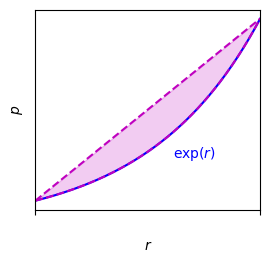

In [203]:
L_LSE = -np.log(1 + np.exp(u))
U_LSE = -np.log(1 + np.exp(l))
r = np.linspace(L_LSE, U_LSE, 1001)
plt.figure(figsize=figSize2)
plt.plot(r, np.exp(r), 'b')
plt.plot(r, np.exp(r), color='m', linestyle='--')
plt.plot(r, (r - L_LSE) / (U_LSE - L_LSE) * np.exp(U_LSE) + (U_LSE - r) / (U_LSE - L_LSE) * np.exp(L_LSE), color='m', linestyle='--')
plt.fill_between(r, np.exp(r), (r - L_LSE) / (U_LSE - L_LSE) * np.exp(U_LSE) + (U_LSE - r) / (U_LSE - L_LSE) * np.exp(L_LSE), color='m', alpha=0.2)
plt.annotate(r'$\exp(r)$', (-0.9, 0.3), color='b')
plt.xlim([L_LSE, U_LSE])
#plt.xticks([L, U], labels=[r'$l$', r'$u$'])
plt.xticks([L_LSE, U_LSE], labels=[' ', ' '])
#plt.xticks([])
plt.yticks([])
plt.xlabel(r'$r$')
plt.ylabel(r'$p$')
plt.savefig(f'../../../AISTATS 2023/Presentation/exp_bounds_LSE.png', bbox_inches='tight', dpi=300)

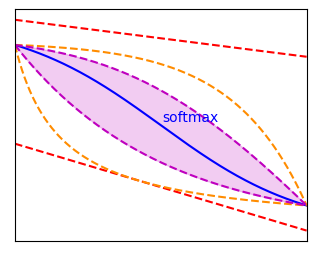

In [216]:
fill = True
thumbnail = True

if thumbnail:
    plt.figure(figsize=(1/0.85*3.2, 1/0.85*2.56))
else:
    plt.figure(figsize=figSize2)
plt.plot(x, y, 'b')
plt.plot(x, linl, 'r--')
plt.plot(x, linu, 'r--')
plt.plot(x, ERl, color='darkorange', linestyle='--')
plt.plot(x, ERu, color='darkorange', linestyle='--')
plt.plot(x, LSEl, color='m', linestyle='--')
plt.plot(x, LSEu, color='m', linestyle='--')
if fill:
    plt.fill_between(x, LSEl, LSEu, color='m', alpha=0.2)
plt.annotate('softmax', (0.02, 0.52), color='b')
plt.xlim([l, u])
if thumbnail:
    plt.xticks([])
else:
    plt.xticks([l, u], labels=[r'$l$', r'$u$'])
plt.yticks([])
if not thumbnail:
    plt.xlabel(r'$x_2 - x_1$')
    plt.ylabel(r'$p$')
if thumbnail:
    plt.savefig(f'../../../AISTATS 2023/Poster/softmax_bounds_LSE_thumbnail.png', bbox_inches='tight', dpi=100)
elif fill:
    plt.savefig(f'../../../AISTATS 2023/Presentation/softmax_bounds_LSE.png', bbox_inches='tight', dpi=300)
else:
    plt.savefig(f'../../../AISTATS 2023/Presentation/softmax_bounds_LSE_nofill.png', bbox_inches='tight', dpi=300)

Linearized bounds

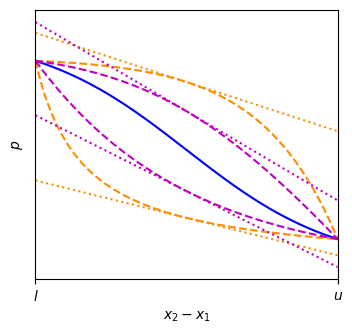

In [208]:
ERl0 = 1 / (u / (u - l) / y_u - l / (u - l) / y_l)
ERl_lin = ERl0 * (1 - ERl0 * (np.exp(u) - np.exp(l)) / (u - l) * x)
ERu_lin = y_l + y_u - y_l * y_u * (2 + x)
LSEl_lin = np.exp((u * log_y_u - l * log_y_l) / (u - l)) * (1 - (log_y_u - log_y_l) / (u - l) * x)
LSEu_lin = (y_l * log_y_u - y_u * log_y_l - (y_u - y_l) * (np.log(2) + x / 2)) / (log_y_u - log_y_l)

plt.figure(figsize=figSize)
plt.plot(x, y, 'b')
#plt.plot(x, linl, 'r--')
#plt.plot(x, linu, 'r--')
plt.plot(x, ERl, color='darkorange', linestyle='--')
plt.plot(x, ERu, color='darkorange', linestyle='--')
plt.plot(x, LSEl, color='m', linestyle='--')
plt.plot(x, LSEu, color='m', linestyle='--')
plt.xlim([l, u])
plt.xticks([l, u], labels=[r'$l$', r'$u$'])
try:
    plt.ylim(yLim)
except NameError:
    pass
plt.yticks([])
plt.xlabel(r'$x_2 - x_1$')
plt.ylabel(r'$p$')
plt.savefig(f'../../../AISTATS 2023/Presentation/softmax_bounds_linearized_0.png', bbox_inches='tight', dpi=300)
plt.plot(x, ERl_lin, color='darkorange', linestyle=':')
plt.plot(x, ERu_lin, color='darkorange', linestyle=':')
plt.plot(x, LSEl_lin, color='m', linestyle=':')
plt.plot(x, LSEu_lin, color='m', linestyle=':')
yLim = plt.ylim()
plt.savefig(f'../../../AISTATS 2023/Presentation/softmax_bounds_linearized.png', bbox_inches='tight', dpi=300)

## Scratch

In [24]:
l = -1
u = -0

In [26]:
x_max = np.log((np.log(1 + np.exp(u)) - np.log(1 + np.exp(l))) / (np.log(1 + np.exp(-l)) - np.log(1 + np.exp(-u))))
x_max

-0.49003427641921443

In [27]:
(u - x_max) / (u - l) * np.log(1 + np.exp(l)) + (x_max - l) / (u - l) * np.log(1 + np.exp(u)) - np.log(1 + np.exp(x_max))

0.029139138501623862

In [28]:
(np.log(1 + np.exp(u)) - np.log(1 + np.exp(l))) / (u - l)

0.3798854930417224

In [29]:
(u * np.log(1 + np.exp(l)) - l * np.log(1 + np.exp(u))) / (u - l)

0.6931471805599453